In [1]:
#This program will help us analyze a database which contains information about credit frauds.
#Features V1-V28 are the principal components obtained with PCA. The only characteristics not transformed with quantity and time.
#The class characteristic takes the value of 1 for the fraud case and the value 0 for the other case.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
sns.set()
%matplotlib inline 

In [42]:
#The data is read:
df=pd.read_csv('C:/Users/jesus/creditcard.csv')

In [45]:
#A general exploration of data is carried out:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_hours
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


In [46]:
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_hours
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000
mean,94813.859575,1.804362e-12,-6.645646e-13,-5.715466e-13,7.597534e-13,2.231885e-13,6.111694e-14,3.285963e-14,-5.139883e-13,-7.734757e-13,...,-7.562790e-13,-1.814000e-13,1.067884e-12,-6.015429e-13,-1.202293e-13,2.643642e-12,-3.222980e-12,88.349619,0.001727,25.845703
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,13.184831
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,15.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,23.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,38.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,47.000000


In [13]:
df.shape

(284807, 31)

In [14]:
df.isnull().sum()#-->Looking for null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [44]:
#Since it has been verified thath all the values are numeric and thera are no null values,
#it is not necessary to perform data cleaning.
#Now we will look for correlation between jthe frauds committed and the principal components: 

In [17]:
len(df[df['Class']==1])

492

In [18]:
len(df[df['Class']==0])

284315

In [33]:
print('Fraud percentage=','{0:f}%'.format(len(df[df['Class']==1])*100/(len(df[df['Class']==0]))))

Fraud percentage= 0.173048%


In [30]:
legit=df[df.Class==0]
fraud=df[df.Class==1]

In [31]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [32]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [43]:
#Let's analyze the behavior of legitimate and fraudulent transactions with respect to time:
df['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

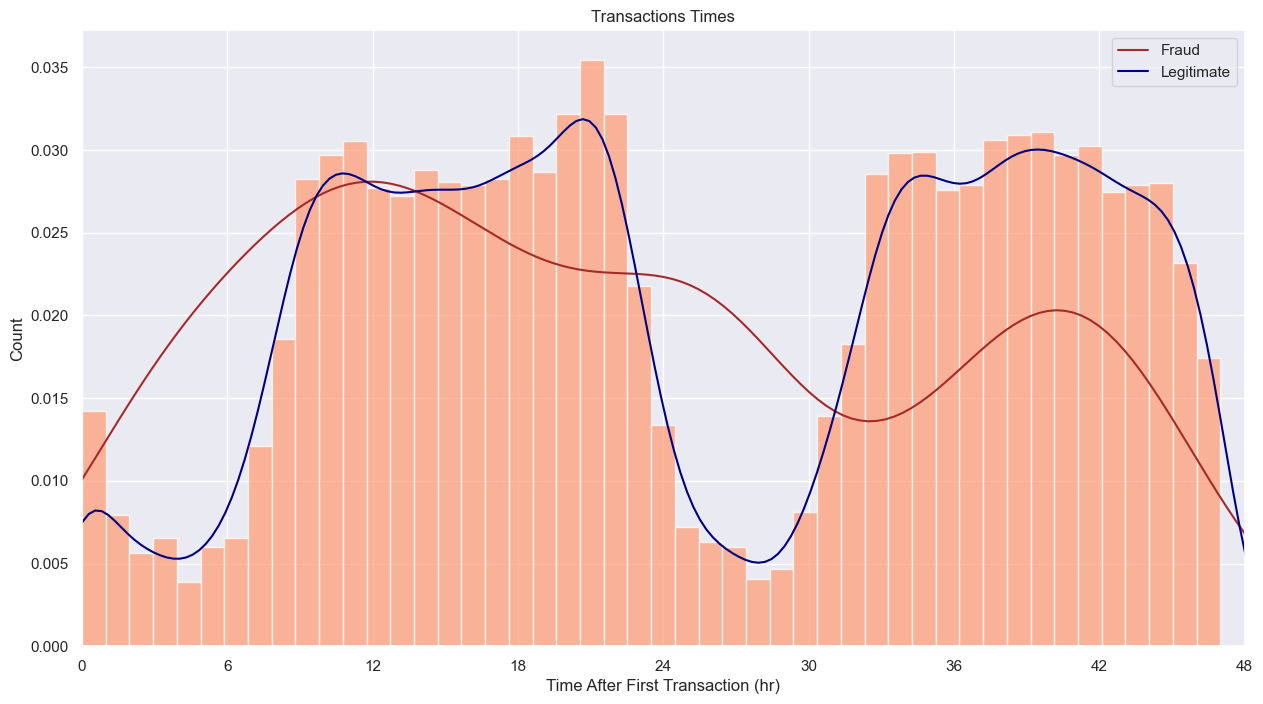

In [44]:
#The time has a max value of 172792 seconds equal to 48 hours, so let's see the behavior of the transactions along the 48 hours:
df['Time_hours'] = (df['Time']/3600).astype(int)
plt.figure(figsize=(15,8))
plt.hist(df['Time_hours'],bins=48,density=True,alpha=0.75,  color='lightsalmon')
sns.kdeplot(df[df['Class'] == 1]['Time_hours'], color='brown', label='Fraud')
sns.kdeplot(df[df['Class'] == 0]['Time_hours'], color='navy', label='Legitimate')
plt.xticks(np.arange(0,54,6))
plt.xlim([0,48])
plt.xlabel("Time After First Transaction (hr)")
plt.ylabel('Count')
plt.title("Transactions Times")
plt.legend()
plt.show()

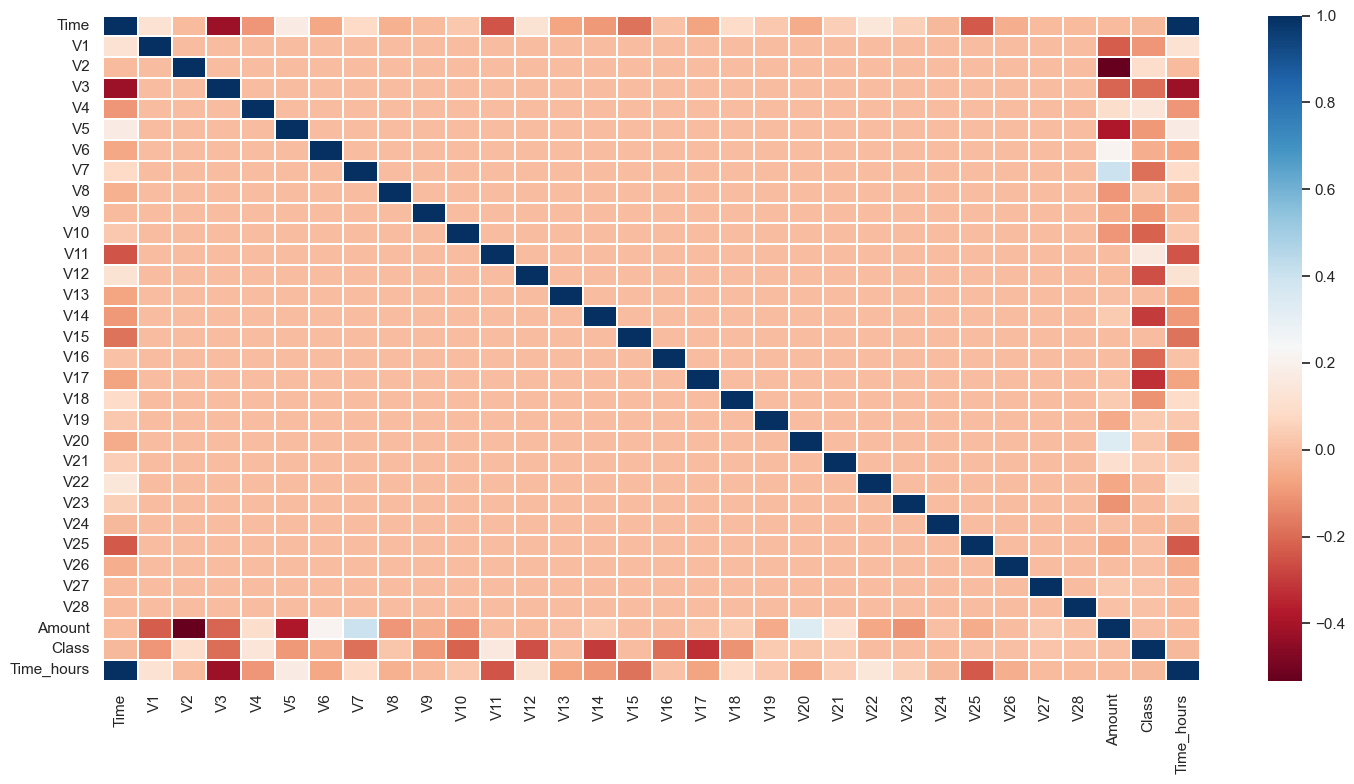

In [13]:
#Let's see the correlation of all the data columns with each other:
corr=df.corr()
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="RdBu",linewidths=.1,ax=ax)
plt.tight_layout()

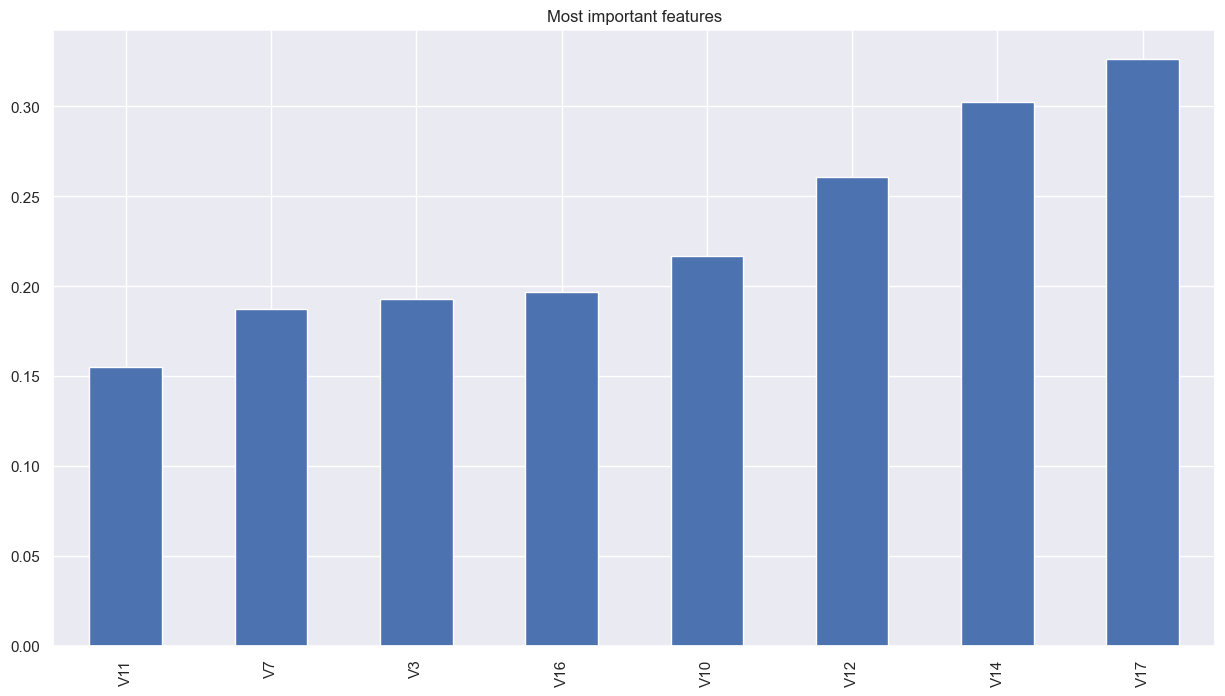

In [59]:
#Let's see which are the columns with the highest correlation with the class column. 
#In this case, a correlation greater than 0.15 is being considered:
filtered_corr = df.corr()['Class'][:-2].abs().sort_values().loc[lambda x: x > 0.15]
plt.figure(figsize=(15,8))
filtered_corr.plot(kind='bar', title='Most important features')
plt.show()

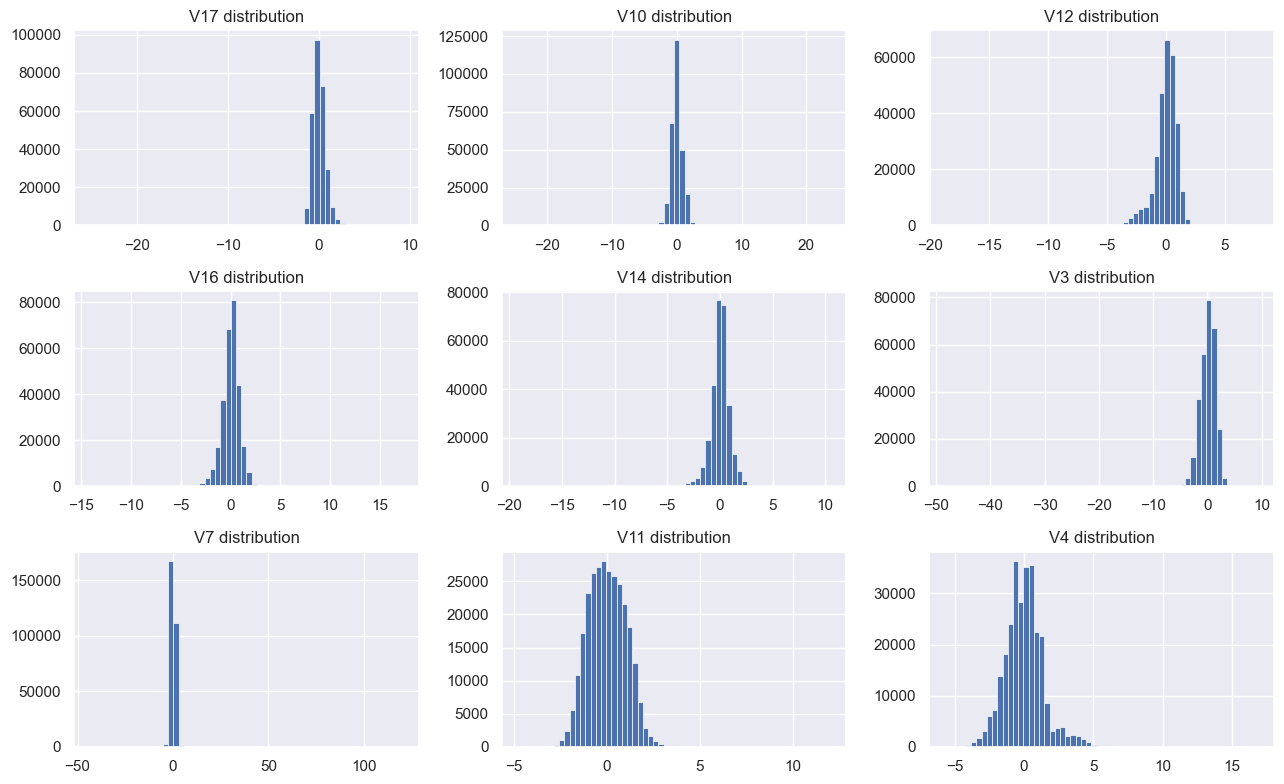

In [34]:
#A distribution chart is created for the columns with the highest correlation
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))

axes[0,0].hist(df['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[1,1].hist(df['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[0,2].hist(df['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[0,1].hist(df['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[1,0].hist(df['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,2].hist(df['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

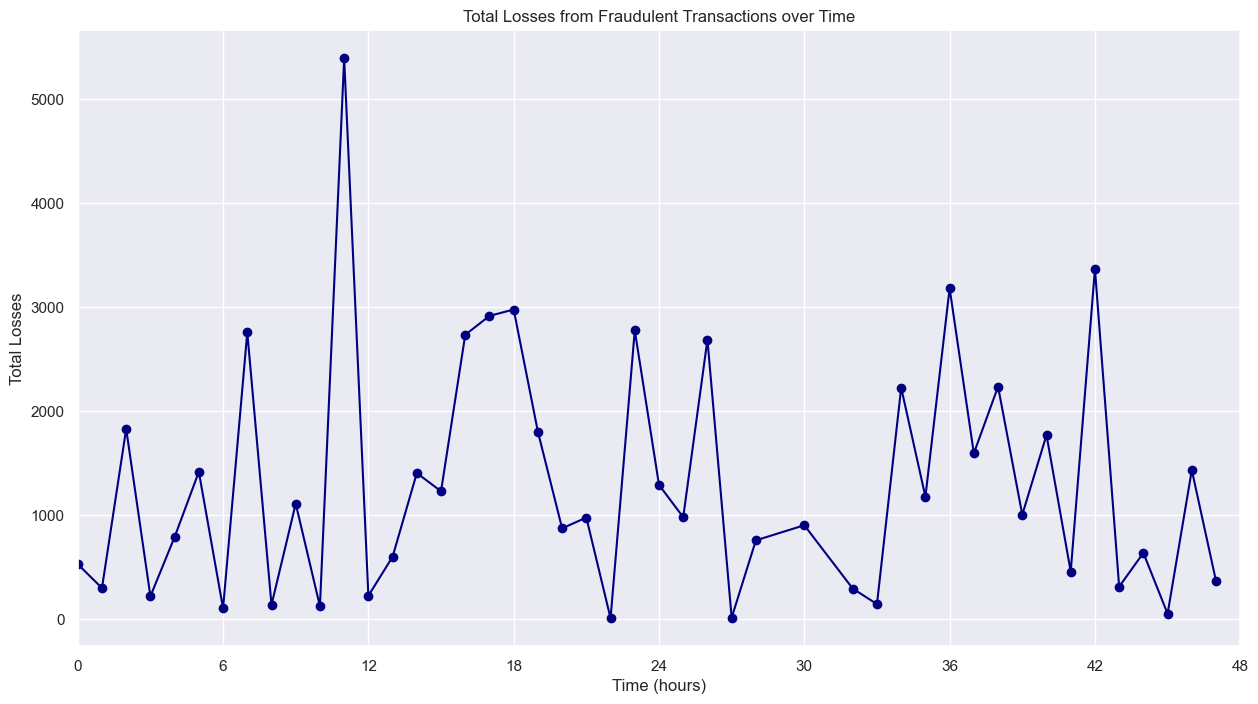

In [60]:
# Finally, the losses caused by fraudulent transactions over time are shown:
losses_by_hour = df[df['Class'] == 1].groupby('Time_hours')['Amount'].sum()
plt.figure(figsize=(15, 8))
plt.plot(losses_by_hour.index, losses_by_hour.values, color='navy', marker='o', linestyle='-')
plt.xticks(np.arange(0,54,6))
plt.xlim([0,48])
plt.xlabel('Time (hours)')
plt.ylabel('Total Losses')
plt.title('Total Losses from Fraudulent Transactions over Time')
plt.grid(True)
plt.show()